Importamos librerias escenciales para EDA y limpieza.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importamos nuestro dataset

In [2]:
data = pd.read_csv('UCI_Credit_Card.csv')
data_modified = data.copy()
data_modified.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Hacemos un primer analisis de los descriptivos estadisticos de nuestro dataframe.
En esta caso todas las columnas de nuestro dataframe son numericas, por lo que todas tienen descriptivos estadisticos.

In [3]:
data_modified.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Generamos nuestra variable dependiente (target), y nuestras variables independientes(inputs).
Eliminamos la columna de ID que no la ocuparemos para nuestro modelado.

In [4]:
x = data_modified.iloc[:,:-1]
x.drop(['ID'],axis=1,inplace=True)
y = data_modified.iloc[:,-1]

Defiminos una funcion para graficas de distribucion.

In [5]:
def grafica_dist(x):
    for col in x:
        fig=sns.displot(x[col])
    return fig

Graficamos la distribucion de todas nuestras variables independientes (inputs).

c:\Users\Pablo\anaconda3\lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


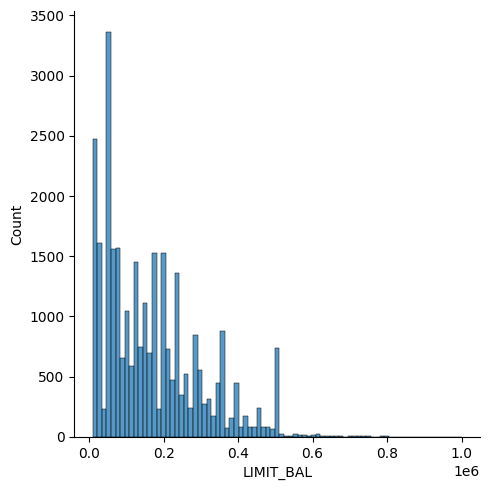

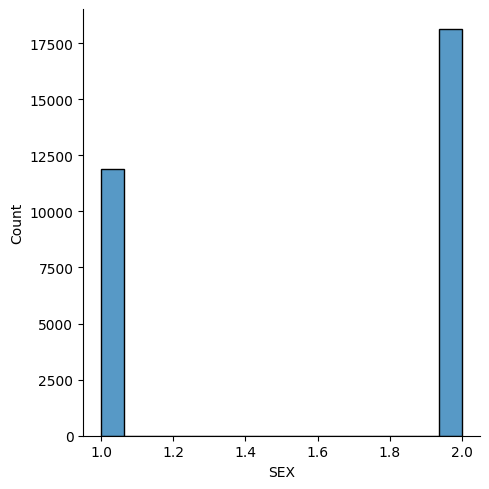

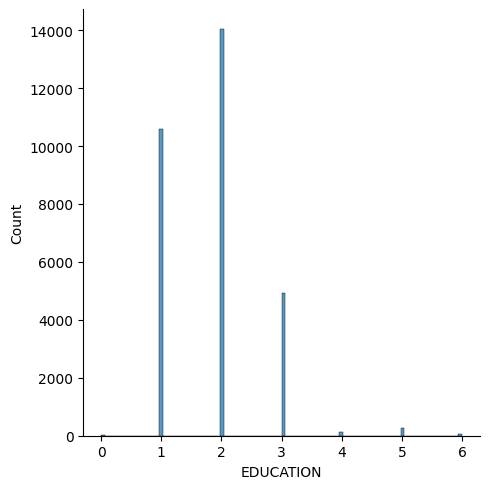

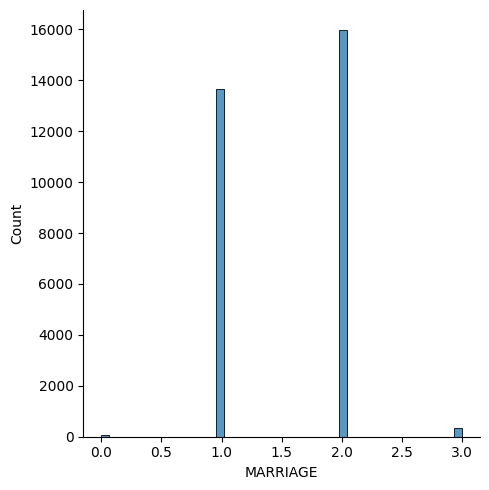

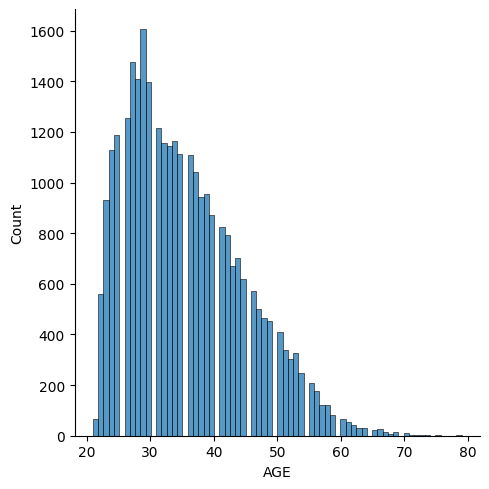

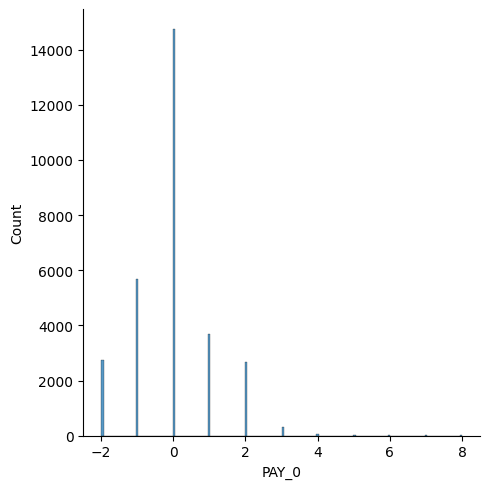

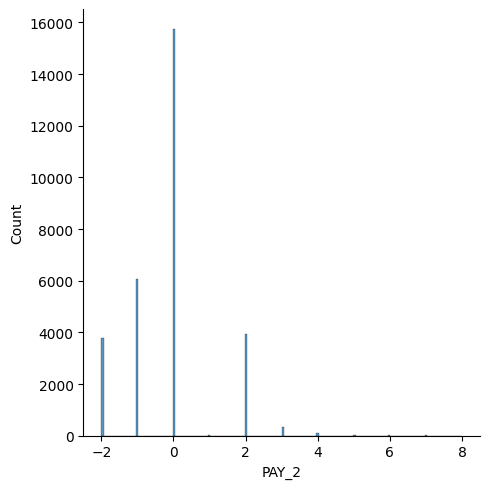

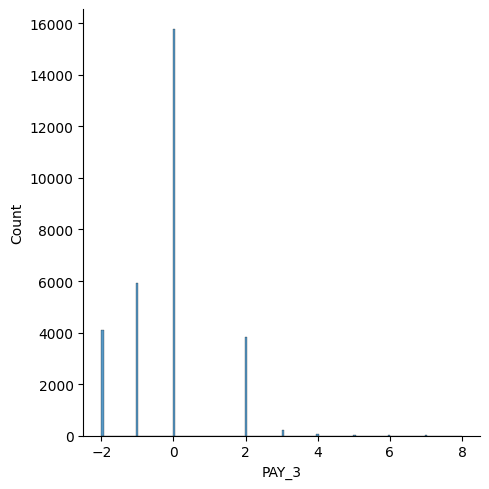

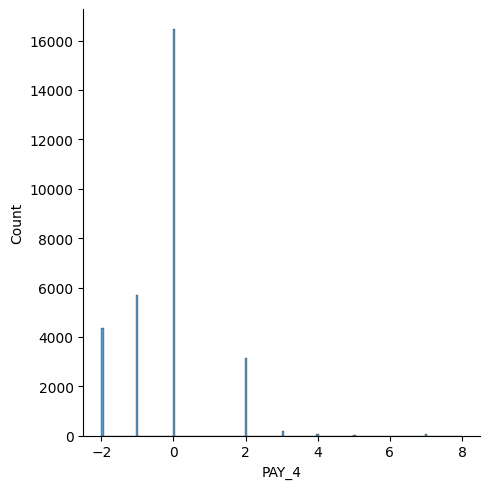

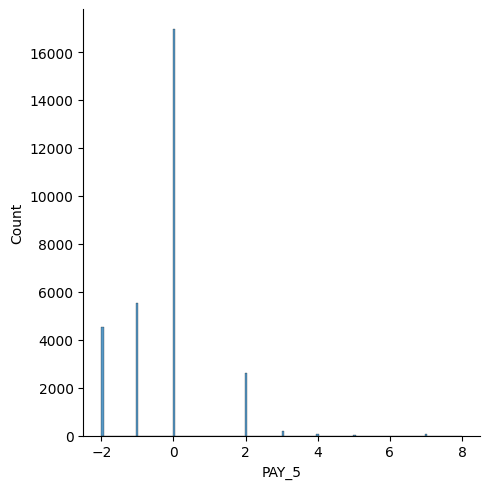

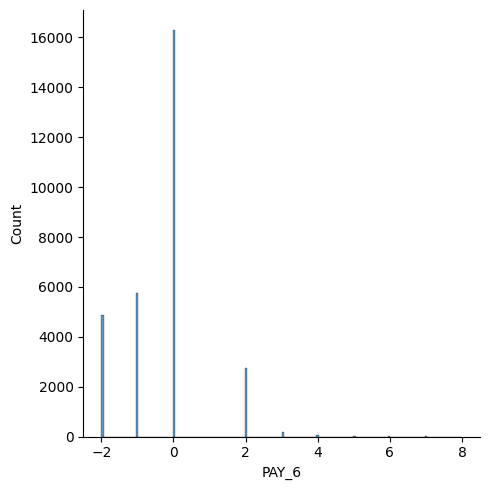

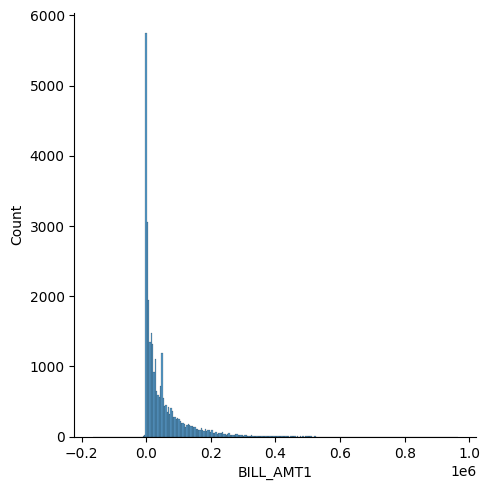

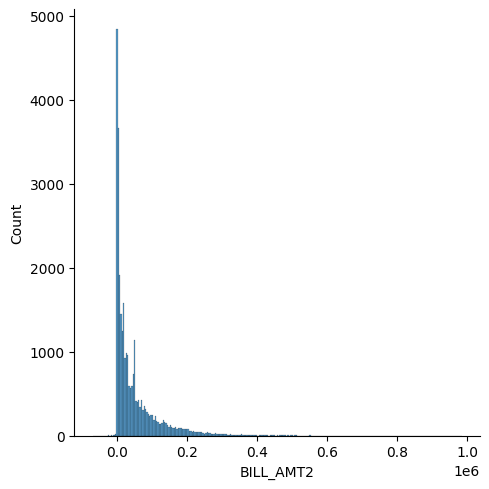

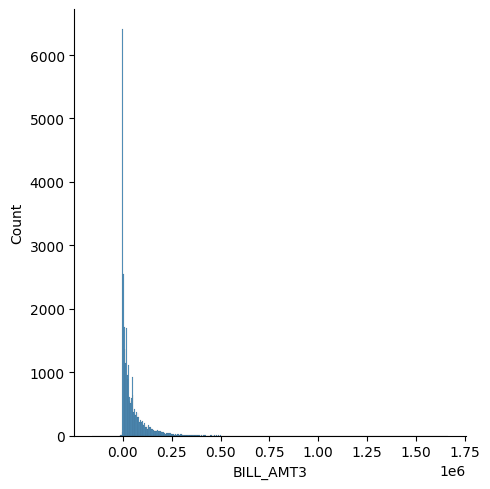

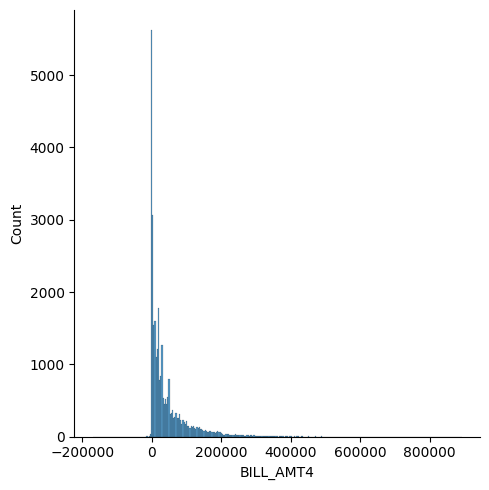

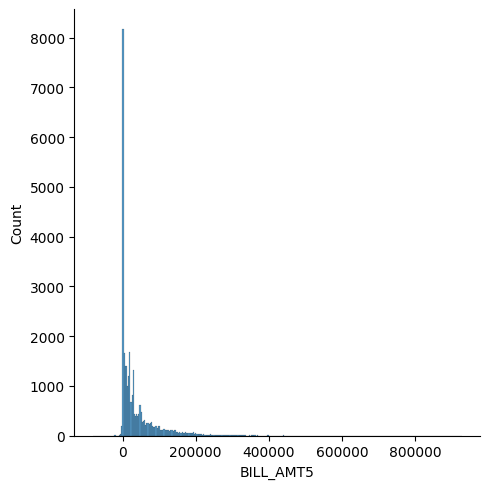

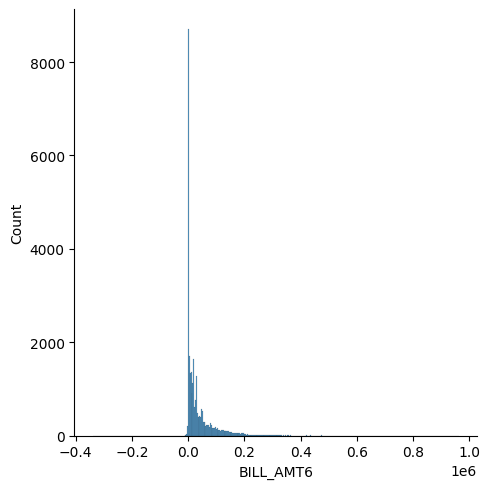

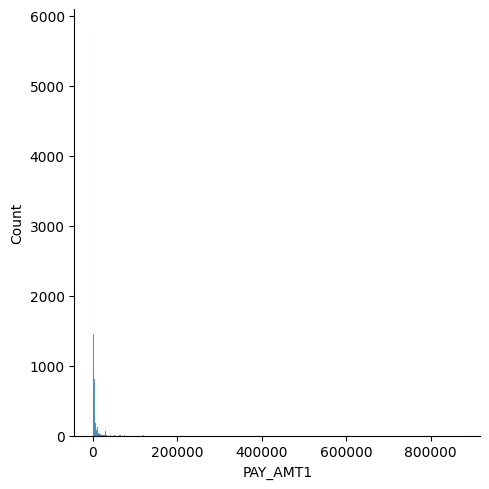

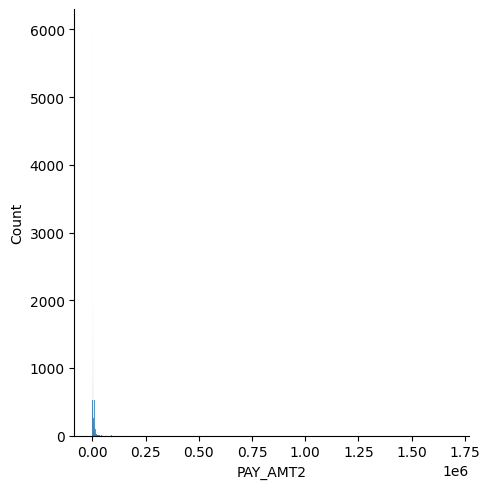

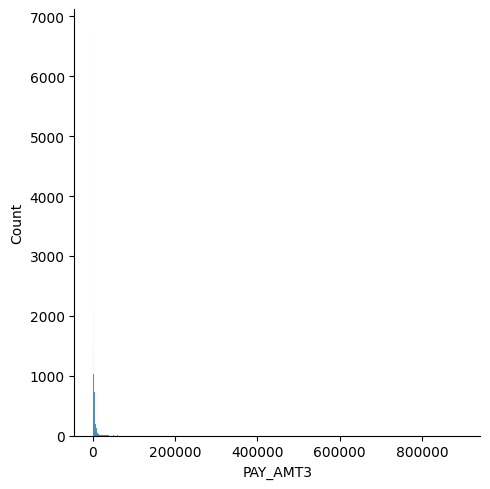

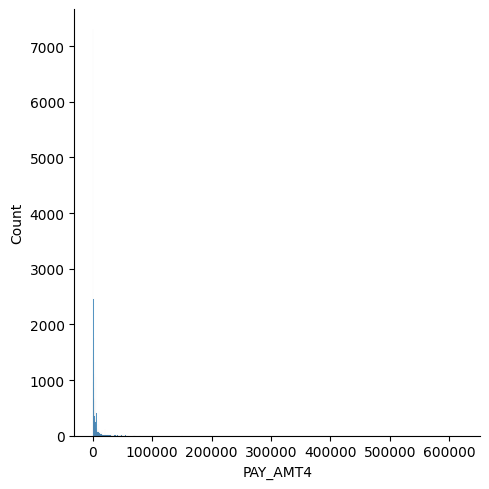

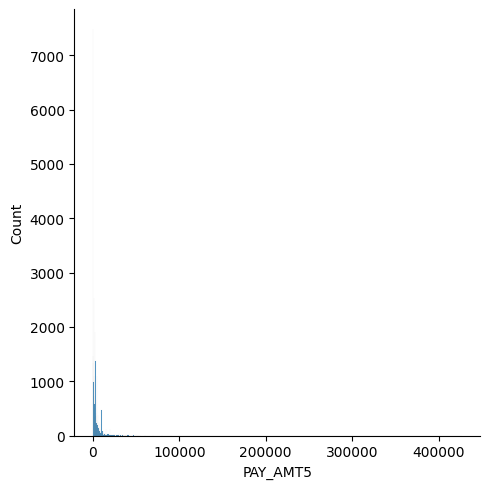

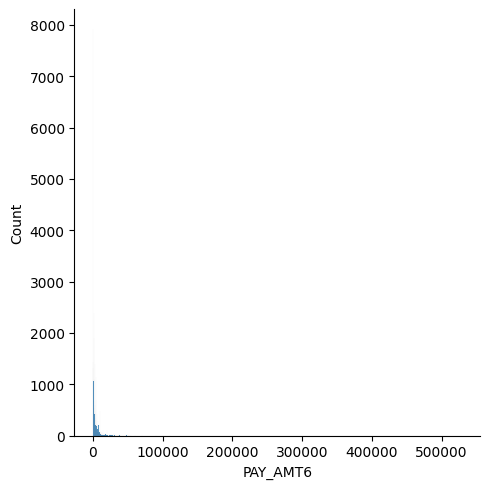

In [6]:
grafica_dist(x)

Realizamos una funcion boxplot para identificar outliers en nuestras columnas, los outliers tambien conocidos como valores atipicos, son muestras distantes de los demas valores.

In [7]:
def boxplot(data):
    fig, axs = plt.subplots(len(data.columns), figsize=(8, 4*len(data.columns)))
    for i, col in enumerate(data.columns):
        ax = axs[i]
        sns.boxplot(data[col], ax=ax)
        ax.set_title(col)

    plt.tight_layout()
    plt.show()

la interpretacion del boxplot o grafico de cajas sirve para identificar los valores atipicos que se encuentran fuera de los "bigotes" que estan representados por el minimo y el maximo.
Realizaremos el graficado para nuestro dataset y despues la interpretacion, para saber si se necesita o no corregir los outliers.

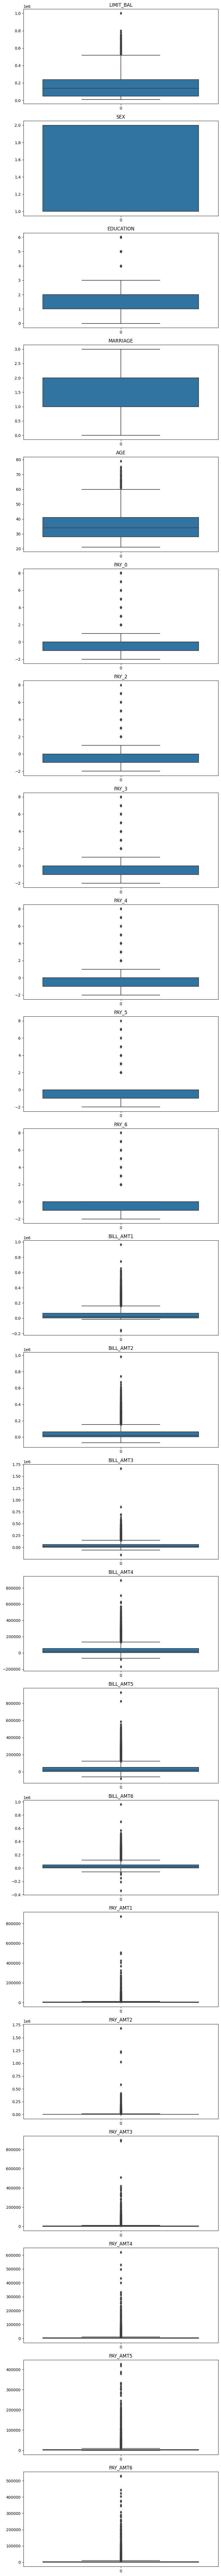

In [8]:
boxplot(x)

Todas o casi todas las columnas necesitan correccion, por lo que definire una funcion para la correcion.

Funcion para corregir outlier: cree una funcion en bucle para corregir todos las columnas del dataframe.
El primer paso es definir y encontrar los cuartiles 1 y 3 que representan el 25% y 75% de nuestra distribucion.
Depues calculamos el rango intercuartil, este es la diferencia entre el cuartil 3 y 1.
Definimos nuestros limites para identificar los valores atipicos.
Limite inferior: los valores atipicos seran los que se encuentren a -1.5 veces del cuartil 1, la funcion para obtenerlo es cuartil 1 - 1.5 * rango intercuartil.
Limite superior: los valores atipicos seran los que se encuentre a 1.5 veces del cuartil 3, la funcion es cuartil 3 + 1.5 * rango intercuartil.
Tambien se puede usar una distancia de 3 en caso de que haya atipicos muy extremos.
Por ultimo sea crea una condicion para identificar los valores atipicos, y en caso de serlo, se le apica la mediana.

In [9]:
def outlier(data):
    for col in data:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1

        lim_inf = q1 - 1.5 * iqr
        lim_sup = q3 + 1.5 * iqr

        data[col] = np.where((data[col] < lim_inf) | (data[col] > lim_sup), data[col].mean(), data[col])

    return data

In [10]:
outlier(x)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2.0,2.0,1.0,24.0,-0.0167,-0.133767,-1.0000,-1.0,-2.0,...,689.0000,0.0,0.0,0.0,0.0000,689.0000,0.0000,0.0,0.000000,0.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0000,-0.133767,0.0000,0.0,0.0,...,2682.0000,3272.0,3455.0,3261.0,0.0000,1000.0000,1000.0000,1000.0,0.000000,2000.0
2,90000.0,2.0,2.0,2.0,34.0,0.0000,0.000000,0.0000,0.0,0.0,...,13559.0000,14331.0,14948.0,15549.0,1518.0000,1500.0000,1000.0000,1000.0,1000.000000,5000.0
3,50000.0,2.0,2.0,1.0,37.0,0.0000,0.000000,0.0000,0.0,0.0,...,49291.0000,28314.0,28959.0,29547.0,2000.0000,2019.0000,1200.0000,1100.0,1069.000000,1000.0
4,50000.0,1.0,2.0,1.0,57.0,-1.0000,0.000000,-1.0000,0.0,0.0,...,35835.0000,20940.0,19146.0,19131.0,2000.0000,5921.1635,10000.0000,9000.0,689.000000,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1.0,3.0,1.0,39.0,0.0000,0.000000,0.0000,0.0,0.0,...,47013.1548,88004.0,31237.0,15980.0,8500.0000,5921.1635,5003.0000,3047.0,5000.000000,1000.0
29996,150000.0,1.0,3.0,2.0,43.0,-1.0000,-1.000000,-1.0000,-1.0,0.0,...,3502.0000,8979.0,5190.0,0.0,1837.0000,3526.0000,8998.0000,129.0,0.000000,0.0
29997,30000.0,1.0,2.0,2.0,37.0,-0.0167,-0.133767,-0.1662,-1.0,0.0,...,2758.0000,20878.0,20582.0,19357.0,0.0000,0.0000,5225.6815,4200.0,2000.000000,3100.0
29998,80000.0,1.0,3.0,1.0,41.0,1.0000,-1.000000,0.0000,0.0,0.0,...,76304.0000,52774.0,11855.0,48944.0,5663.5805,3409.0000,1178.0000,1926.0,4799.387633,1804.0


In [11]:
x.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,164977.318730,1.603733,1.807911,1.551867,35.222669,-0.252276,-0.472530,-0.493451,-0.505170,-0.514036,...,31952.697373,28741.645773,26265.009888,25244.651592,3007.075916,2940.179658,2563.690418,2242.943871,2250.470386,2260.101653
std,125179.351588,0.489129,0.694294,0.521970,8.785127,0.785328,0.697301,0.709318,0.721028,0.730453,...,34468.162935,31002.349781,28611.875083,28204.472681,2686.439722,2696.153421,2528.924996,2225.100137,2234.874078,2287.257547
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-61506.000000,-65167.000000,-61372.000000,-57060.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2667.750000,2329.000000,1763.750000,1259.750000,1000.000000,833.000000,390.000000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20089.000000,19053.500000,18105.500000,17094.000000,2100.000000,2009.000000,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,47013.154800,43262.948967,40311.400967,38871.760400,5006.000000,5000.000000,4505.000000,4013.250000,4031.500000,4000.000000
max,520000.000000,2.000000,3.000000,3.000000,60.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,146410.000000,132754.000000,122830.000000,121062.000000,11013.000000,11249.000000,10673.000000,9584.000000,9700.000000,9817.000000


Definimos una funcion para graficar la correlacion de nuestras variables inputs respecto a nuestra variable dependediente (target)

In [12]:
def correlacion(x, y):
    corr_matrix = pd.concat([x, y], axis=1).corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    corr_matrix = corr_matrix.mask(mask)
    plt.figure(figsize=(12, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5,
                annot_kws={'size': 5}, cbar_kws={'shrink': 0.4})
    plt.title('Gráfico de Correlaciones')
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(rotation=0, fontsize=8)
    plt.tight_layout()
    plt.show()
    
    df_corr = x.corrwith(y).abs().sort_values(ascending=False)
    df_corr_matrix = pd.DataFrame(df_corr, columns=['Correlación'])
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Correlación respecto a {y.name}')
    plt.xlabel('Variable')
    plt.ylabel('Correlación')
    plt.show()

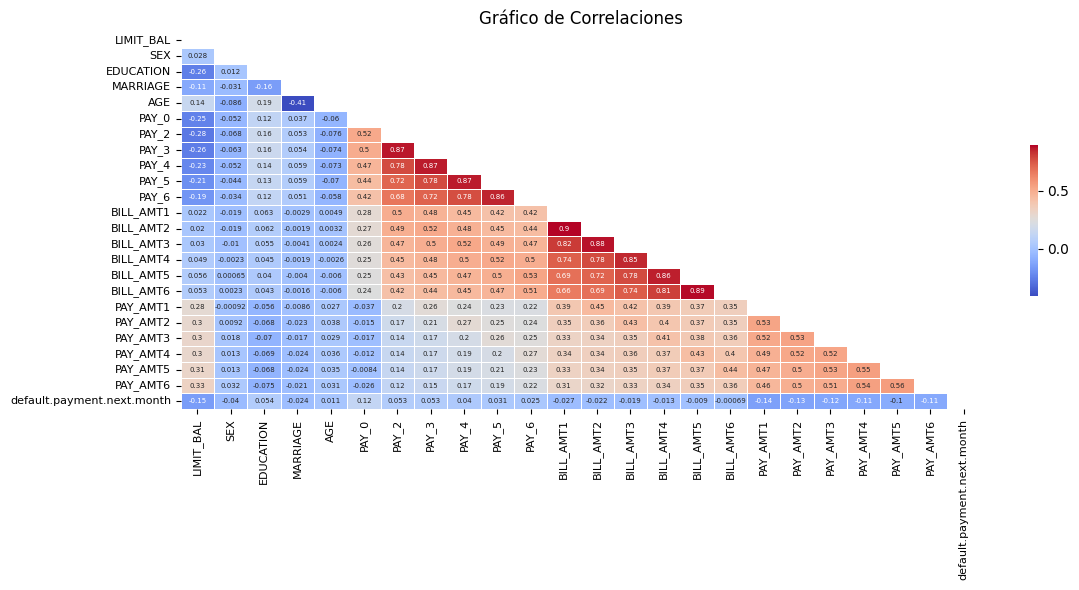

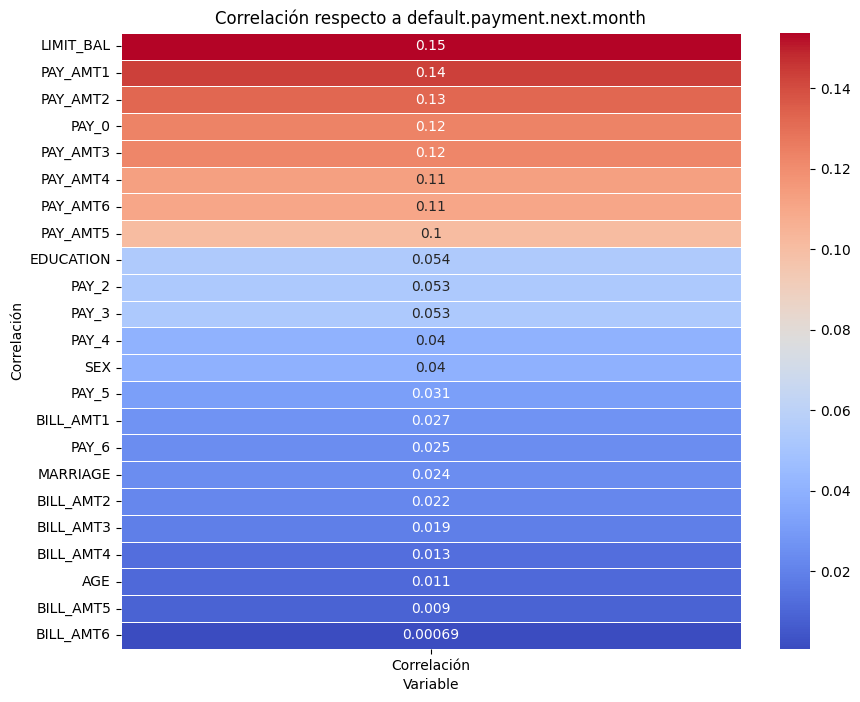

In [13]:
correlacion(x,y)

Importamos las librerias para nuestro modelado.

In [14]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import statsmodels.api as sm
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix,ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer

Creamos nuestros dataframes de entrenamiento y prueba, usaremos el 20% de nuestros valores total para prueba.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Usaremos Pipeline, que es un gestor de flujos de trabajo para ML, este nos realizara la transformacion de las variables y la estimacion.
En este caso mediante los classifeiers:
1- Random Forest: este es un algoritmo compuesto por un conjunto de arboles de decision, cada arbol se compone por una muestra de los datos extraidos del dataframe de entrenamiento, esta es nuestra muestra de arranque,de estas 1/3 van destinadas a pruebas (oob) out of bag,se crear una instancia de aleatoriedad en el agrupamiento de caracteristicas, reduciendo la correlacion entre los arboles ya que tiene mas diversidad, al ser un clasificador los arboles arrojaran la variable mas frecuente, por ultimo la muestra (oob) hace una validacion crudaza para el resultado final(prediccion)

2- AdaBoost: crea varios predictores sencillos en secuencia, con la finalidad de que el segundo ajuste bn lo que el primero no pudo, mientras el tercero haga lo mismo respecto al segundo y asi sucesivamente.

3- Gradient Boosting: algoritmo formado por conjunto de decision trees individuales, estos se entrenan de forma secuencial de fomar de cada arbol nuevo trate de mejorar los errores de los anteriores, la prediccion de una nueva observacion se obtiene agregando las predicciones de todos los arboles individuales que forman el modelo.

Los modelos que use todos estan basados en arboles de decision, no profundice en ajustar los hiperparametros, en un futuro indigare mas a fondo sobre el ajuste de hiperparametros.

In [16]:
features_num = Pipeline(steps=[
    ('Imputer',IterativeImputer()),
    ('Scaler',StandardScaler())
])

preprocesado =ColumnTransformer(
    transformers=[
        ('num',features_num,X_train.columns.tolist())
    ]
)
clasificadores = {
    'RandomForest Classifier':RandomForestClassifier(),
    'AdaBoos Classifier':AdaBoostClassifier(),
    'Gradient Boosting Classifier':GradientBoostingClassifier()
}

resultados_clasificadores =[]
#Cree una lista para almacenar los clasificadores

Creo un bucle para el diccionario de clasificadores, clf es el nom,bre de clasificador y clf el propo clasificador.
Se realiza ambas etapas del pipelie, que es el preprocesado y el clasificador.
Se entrena el pipele con los inputs y targe de entrenamiento y procedemos a la creacion de nuestro target predict y las metricas de evaluacion y nuestra matriz de confusion (La interpretare mas adelante).
Almacenamos nuestros resultados en un diccionario.
Creamos una lista con los resultados de nuestros clasificadores.
Creamos la visualizacion de nuestra matriz de confusion.

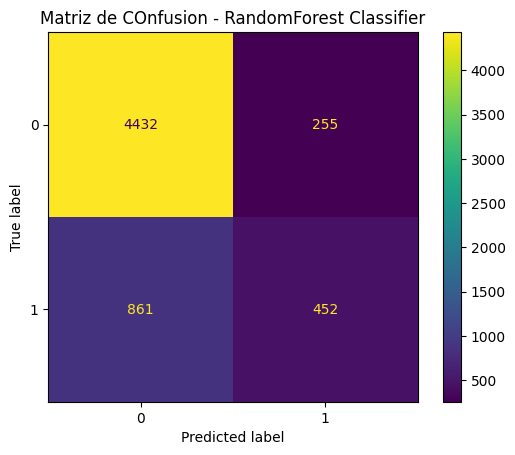

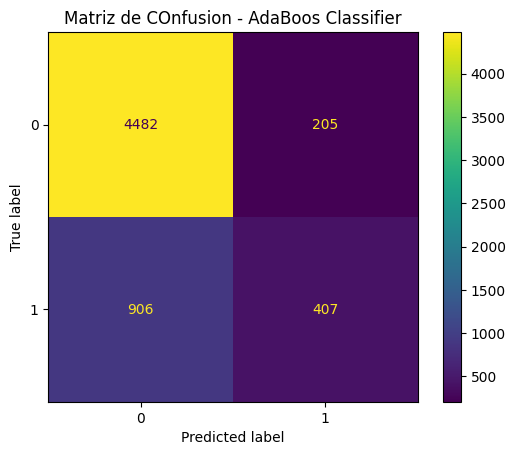

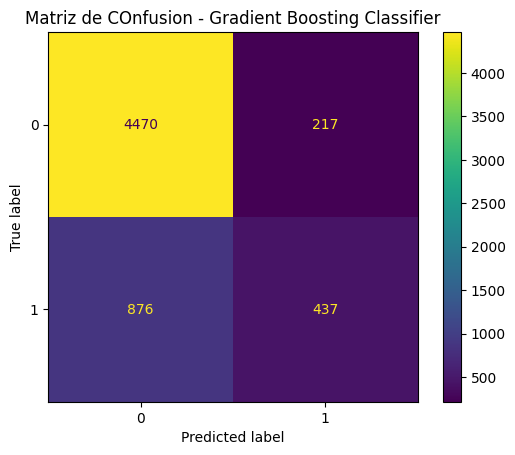

In [17]:
for clf_name, clf in clasificadores.items():
    pipeline = Pipeline(steps=[
        ('preprocesado',preprocesado),
        ('clasificador',clf)
    ])
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test,y_pred, average='binary')
    cm =confusion_matrix(y_test,y_pred)

    resultados = {
        'Clasificador':clf_name,
        'Accuracy':accuracy,
        'Precision':precision,
        'Recall':recall,
        'F1-Score':f1,
        'Matriz de confusion':cm
    }

    resultados_clasificadores.append(resultados)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Matriz de COnfusion - {clf_name}')
    plt.show()

Interretacion matriz de confusion.
Verdadero positivo (TP): El modelo predijo correctamente que la muestra pertenece a la clase positiva.
Falso negativo (FN): El modelo predijo incorrectamente que la muestra pertenece a la clase negativa cuando en realidad pertenece a la clase positiva.
Falso positivo (FP): El modelo predijo incorrectamente que la muestra pertenece a la clase positiva cuando en realidad pertenece a la clase negativa.
Verdadero negativo (TN): El modelo predijo correctamente que la muestra pertenece a la clase negativa.

Hacemos un dataframe para las metricas de nuestros clasificadores.

In [18]:
clasificadores_df = pd.DataFrame(resultados_clasificadores)
clasificadores_df

,Clasificador,Accuracy,Precision,Recall,F1-Score,Matriz de confusion
0,RandomForest Classifier,0.814000,0.639321,0.344250,0.447525,"[[4432, 255], [861, 452]]"
1,AdaBoos Classifier,0.814833,0.665033,0.309977,0.422857,"[[4482, 205], [906, 407]]"
2,Gradient Boosting Classifier,0.817833,0.668196,0.332826,0.444331,"[[4470, 217], [876, 437]]"


Interpretacion de Metricas:
Exactitud (Accuracy): Se calcula dividiendo la suma de los verdaderos positivos y verdaderos negativos entre el total de muestras. Representa la proporción de predicciones correctas realizadas por el modelo.

Accuracy = (TP + TN) / (TP + TN + FP + FN)
Precisión (Precision): Se calcula dividiendo los verdaderos positivos entre la suma de los verdaderos positivos y los falsos positivos. Representa la proporción de muestras correctamente identificadas como positivas entre todas las muestras clasificadas como positivas.

Precision = TP / (TP + FP)
Sensibilidad o Tasa de verdaderos positivos (Recall o True Positive Rate): Se calcula dividiendo los verdaderos positivos entre la suma de los verdaderos positivos y los falsos negativos. Representa la proporción de muestras positivas correctamente identificadas.

Recall = TP / (TP + FN)
Especificidad (Specificity): Se calcula dividiendo los verdaderos negativos entre la suma de los verdaderos negativos y los falsos positivos. Representa la proporción de muestras negativas correctamente identificadas.

Specificity = TN / (TN + FP)
Valor F1 (F1 Score): Es una medida de la precisión y sensibilidad combinadas. Es útil cuando se desea un equilibrio entre ambas métricas. Se calcula como la media armónica de la precisión y la sensibilidad.

F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
La interpretación de la matriz de confusión depende del contexto y los objetivos del problema. En general, se busca maximizar la precisión, sensibilidad y valor F1, y minimizar los falsos positivos y falsos negativos. La matriz de confusión proporciona una visión completa del rendimiento del modelo en términos de aciertos y errores en cada clase, lo que ayuda a evaluar su capacidad de clasificación.

In [19]:
#Elegi el mejor clasificador respecto a su precision.
mejor_clasificador = max(resultados_clasificadores, key=lambda x: x['Accuracy'])
mejor_clf_name = mejor_clasificador['Clasificador']
mejor_pipeline_best = clasificadores[mejor_clf_name]

In [20]:
#Con el mejor clasificador realice una prediccion de probabilidad para nuestros resultados.
#Las almacene en un dataframe.
probabilidad_default = mejor_pipeline_best.predict_proba(X_test)
prob_default_df = pd.DataFrame(probabilidad_default)
prob_default_df

c:\Users\Pablo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


,0,1
0,0.126370,0.873630
1,0.126370,0.873630
2,0.126370,0.873630
3,0.202587,0.797413
4,0.198439,0.801561
...,...,...
5995,0.514839,0.485161
5996,0.151626,0.848374
5997,0.202587,0.797413
5998,0.736701,0.263299


Por ultimo cree condiciones para cada escenario que podria suceder con nuestra probabilidad.
E saque el porcentaje de posibilidad para cada escenario.

In [21]:
prob_default_df ['Escenario'] = ''
prob_default_df.loc[prob_default_df[1] >0.9, 'Escenario'] = 'Default'

prob_default_df.loc[(prob_default_df[1] >0.6) &
                         (prob_default_df[1]<0.9), 'Escenario'] = 'Alta Posibilidad de Default'

prob_default_df.loc[(prob_default_df[1] >0.3) &
                         (prob_default_df[1]<0.6), 'Escenario'] = 'Mediana Posibilidad de Default'

prob_default_df.loc[prob_default_df[1] <0.3, 'Escenario'] = 'Baja Posibilidad de Default'

prob_default_df

,0,1,Escenario
0,0.126370,0.873630,Alta Posibilidad de Default
1,0.126370,0.873630,Alta Posibilidad de Default
2,0.126370,0.873630,Alta Posibilidad de Default
3,0.202587,0.797413,Alta Posibilidad de Default
4,0.198439,0.801561,Alta Posibilidad de Default
...,...,...,...
5995,0.514839,0.485161,Mediana Posibilidad de Default
5996,0.151626,0.848374,Alta Posibilidad de Default
5997,0.202587,0.797413,Alta Posibilidad de Default
5998,0.736701,0.263299,Baja Posibilidad de Default


In [22]:
default_pct=prob_default_df['Escenario'].value_counts()

In [23]:
default_pct = pd.DataFrame(default_pct)
default_pct.reset_index(inplace=True)
default_pct.rename(columns={'index': 'Escenario',
                            'Escenario':'Total'}, inplace=True)

In [24]:
default_pct['% Posibilidad Total'] = (default_pct['Total'] / default_pct['Total'].sum()).round(2)

In [25]:
default_pct

,Escenario,Total,% Posibilidad Total
0,Alta Posibilidad de Default,3993,0.67
1,Mediana Posibilidad de Default,1166,0.19
2,Baja Posibilidad de Default,502,0.08
3,Default,339,0.06


Con esto concluimos nuestro modelo de prediccion y probabilidad de posibles defaults para el mes siguiente.

In [26]:
#Guardare el archhivo a csv para hacer un analisis y crear algunos dashboards en tableau.
data_final = pd.concat([x,y],axis=1)
data_final.insert(0,'ID',data['ID'])

In [27]:
data_final.to_csv('UCI_Credit_Card_New.csv',index=False)